<a href="https://colab.research.google.com/github/Carlosrbrj/DataValidation/blob/main/Moka_CLientes_Valida%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória de dados - BIUD

Esse notebook tem como objetivo criar validar os dados dos clientes antes de subir na plataforma. Para, isso dividi essa análise em três partes, que também forma 3 datasets. Aqui, iremos iniciar análise a partir dos dados de vendas.

Sendo assim, o código abaixo importar todos os pacotes que poderemos usar nessa análise.

In [17]:
# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import missingno as ms # para tratamento de missings
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

Agora, vamos importar a biblioteca que permite importar um dataset a partir de um link público do google.

In [18]:
# Esse é o link que será o caminho público do arquivo que montamos.
link_csv = '/content/Moka - clientes totais - certo.csv'

In [19]:
# Lê o arquivo
dataset = pd.read_csv(link_csv)

# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,id,cpf,name,phone,email,gender,born_at,message_phone_validation,sum,count
0,9557563,4604319944,Consumidor Final - Padrao,NaN,NaN,NaN,NaN,A quantidade de digitos desse telefone é invál...,1120.00,2
1,9557564,3252121980,APP - 03252121980,NaN,NaN,NaN,NaN,A quantidade de digitos desse telefone é invál...,2175.00,3
2,9557565,16316520875,Consumidor Final - Padrao,NaN,NaN,NaN,NaN,A quantidade de digitos desse telefone é invál...,780.00,1
3,9557566,13339579989,13339579989,NaN,NaN,NaN,NaN,A quantidade de digitos desse telefone é invál...,560.00,1
4,9557567,38674149987,EUGENIA MOGEOL,4.199911e+10,eugen618@hotmail.com,NaN,NaN,O telefone é válido!,3971.95,3
5,9557569,2119450994,02119450994,NaN,NaN,NaN,NaN,A quantidade de digitos desse telefone é invál...,780.00,1
6,9557570,8683934950,Consumidor Final - Padrao,NaN,NaN,NaN,NaN,A quantidade de digitos desse telefone é invál...,780.00,1
7,9557571,18749810944,18749810944,NaN,NaN,NaN,NaN,A quantidade de digitos desse telefone é invál...,1215.00,1
8,9557572,9730851425,09730851425,NaN,NaN,NaN,NaN,A quantidade de digitos desse telefone é invál...,440.00,1
9,9557573,54511577900,Consumidor Final - Padrao,NaN,NaN,NaN,NaN,A quantidade de digitos desse telefone é invál...,1170.00,1


## 1. Análise descritivas

Uma vez carregado o dataset, vamos começar as análises do dataset identificando o seu tamanho, e as informações inciais.

In [20]:
# Mostra as dimensões do dataset
dataset.shape

(15678, 10)

In [21]:
# tentativa de contar único
dataset.count()

id                          15678
cpf                         15678
name                        15678
phone                       10553
email                        9665
gender                       9640
born_at                       483
message_phone_validation    15678
sum                         15678
count                       15678
dtype: int64

In [22]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15678 entries, 0 to 15677
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15678 non-null  int64  
 1   cpf                       15678 non-null  int64  
 2   name                      15678 non-null  object 
 3   phone                     10553 non-null  float64
 4   email                     9665 non-null   object 
 5   gender                    9640 non-null   object 
 6   born_at                   483 non-null    object 
 7   message_phone_validation  15678 non-null  object 
 8   sum                       15678 non-null  float64
 9   count                     15678 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 1.2+ MB


In [23]:
# Verifica a distribuição por telefones válidos
dataset.groupby('message_phone_validation').size()

message_phone_validation
A quantidade de digitos desse telefone é inválida!    5817
O DDD é invalido!                                        4
O nono digito está incorreto, deve ter o valor 9!       60
O numero possui muitos digitos repetidos!                4
O telefone é válido!                                  9681
Só é aceito numeros de celular!                        112
dtype: int64

In [24]:
# Verifica a distribuição por quantidade
dataset.groupby('count').size()

count
1     9607
2     2339
3     1091
4      661
5      457
6      332
7      274
8      195
9      142
10     115
11      94
12      67
13      70
14      75
15      64
16      47
17      18
18      13
19       5
20       3
21       2
23       2
24       1
25       1
29       1
38       1
93       1
dtype: int64

In [25]:
# Verifica a distribuição por quantidade
dataset.groupby('sum').size()

sum
0.00        4
2.00        3
10.00       1
32.50       1
50.90       1
           ..
22862.00    1
22935.60    1
23520.00    1
24251.30    1
25579.95    1
Length: 6253, dtype: int64

In [26]:
# Verificando as propriedades estatísticas do dataset
dataset.describe()

,id,cpf,phone,sum,count
count,1.567800e+04,1.567800e+04,1.055300e+04,15678.000000,15678.000000
mean,9.839828e+06,2.217635e+10,3.451816e+10,1715.732526,2.352787
std,2.337427e+05,2.424952e+10,2.011701e+10,2093.913772,2.827499
min,9.557563e+06,1.836285e+06,2.498000e+03,0.000000,1.000000
25%,9.567579e+06,4.953394e+09,1.199904e+10,544.262500,1.000000
50%,9.888254e+06,9.506160e+09,4.198839e+10,950.000000,1.000000
75%,9.892848e+06,3.677636e+10,4.799622e+10,1995.000000,2.000000
max,1.048415e+07,9.993430e+10,1.000000e+11,25579.950000,93.000000


In [27]:
# verificando nulls no dataset
dataset.isnull().sum()

id                              0
cpf                             0
name                            0
phone                        5125
email                        6013
gender                       6038
born_at                     15195
message_phone_validation        0
sum                             0
count                           0
dtype: int64

<Axes: >

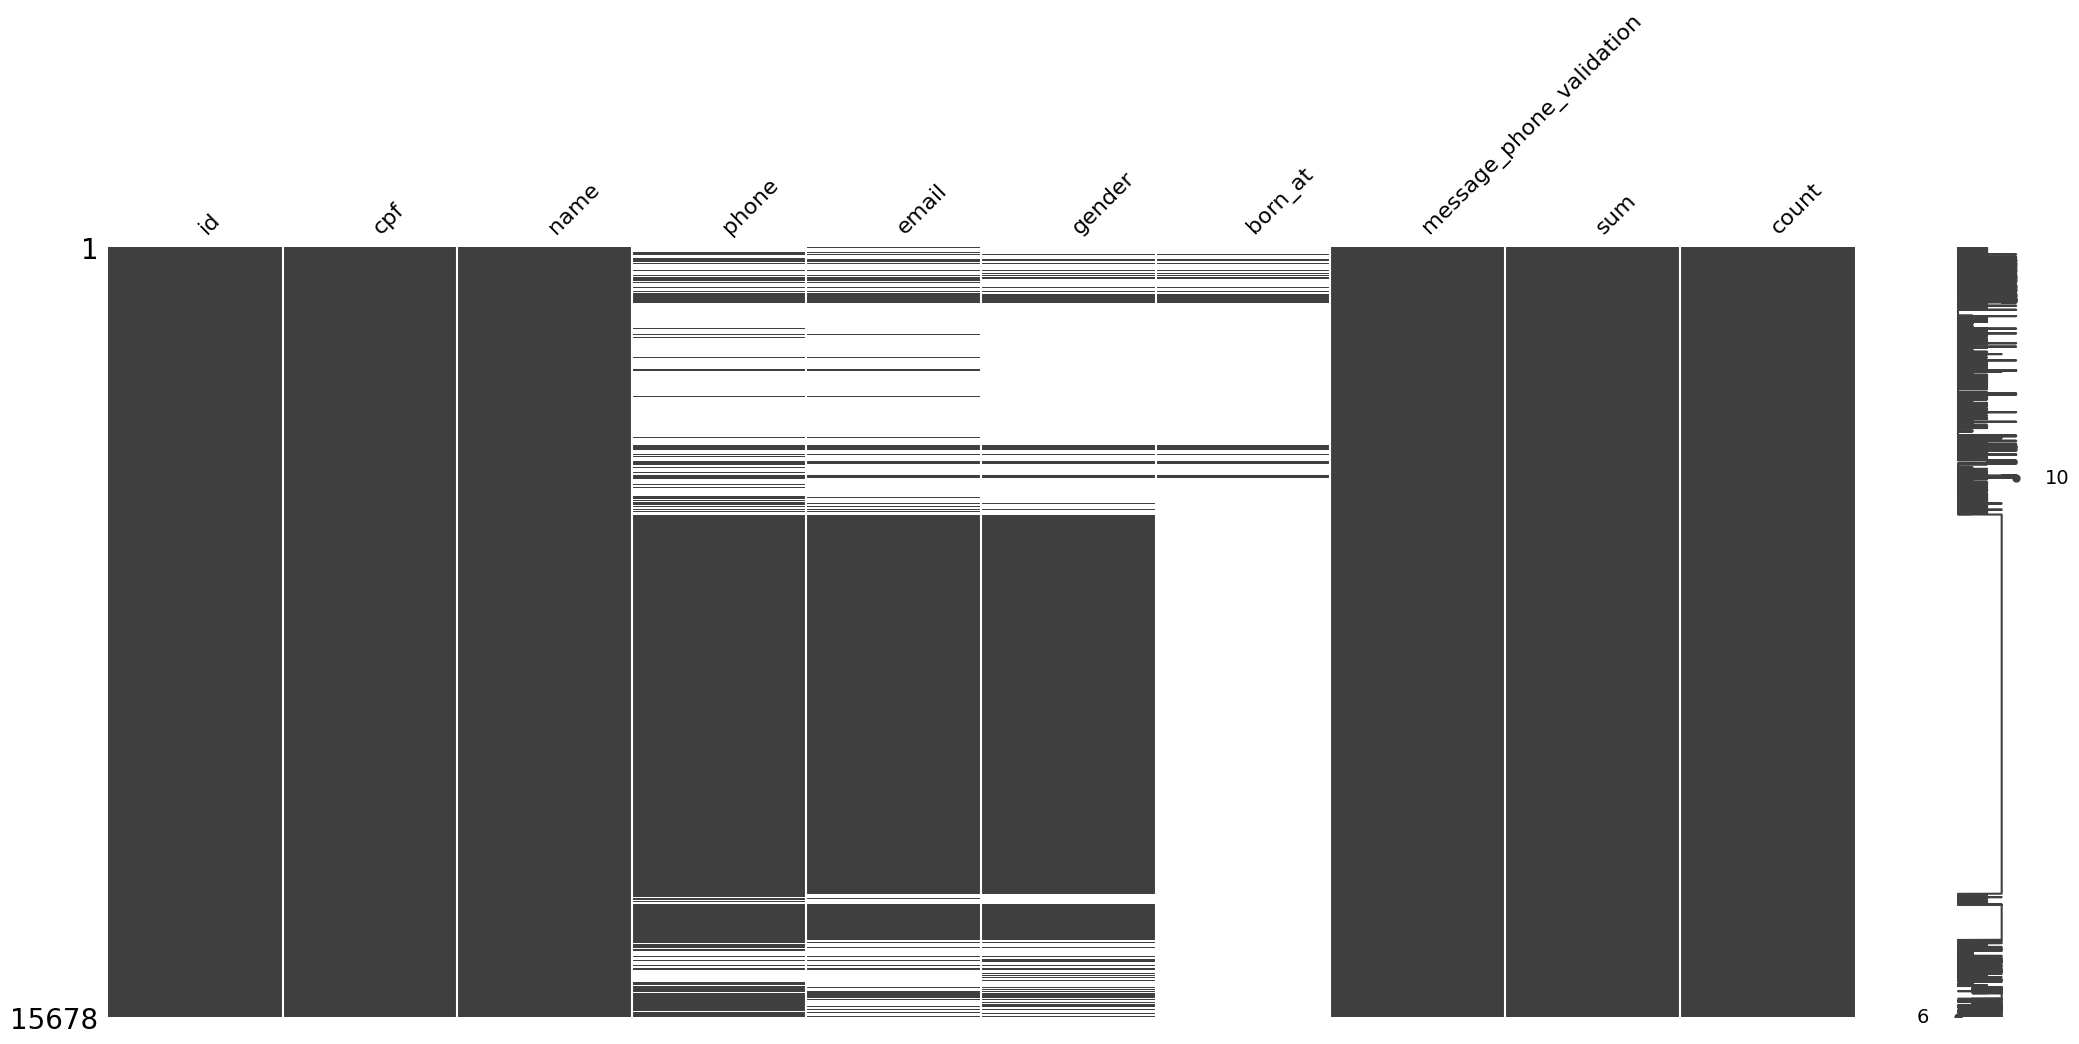

In [28]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(dataset)

Inicialmente, conseguimos observar que existem 131.624 IDs únicos na base de dados. Além disso, podemos observar que existem cerca de 130 mil clientes com telefone. Por fim, inicialmente, nenhum cliente possui um valor total de vendas zeradas ou quantidade de compras zeradas.
Antes de darmos início ao tratamento de dados, iremos criar um novo dataset para resguardar o orginal. Além disso, no novo dataset, vamos trocar todos os valores zero por Na.

<Axes: >

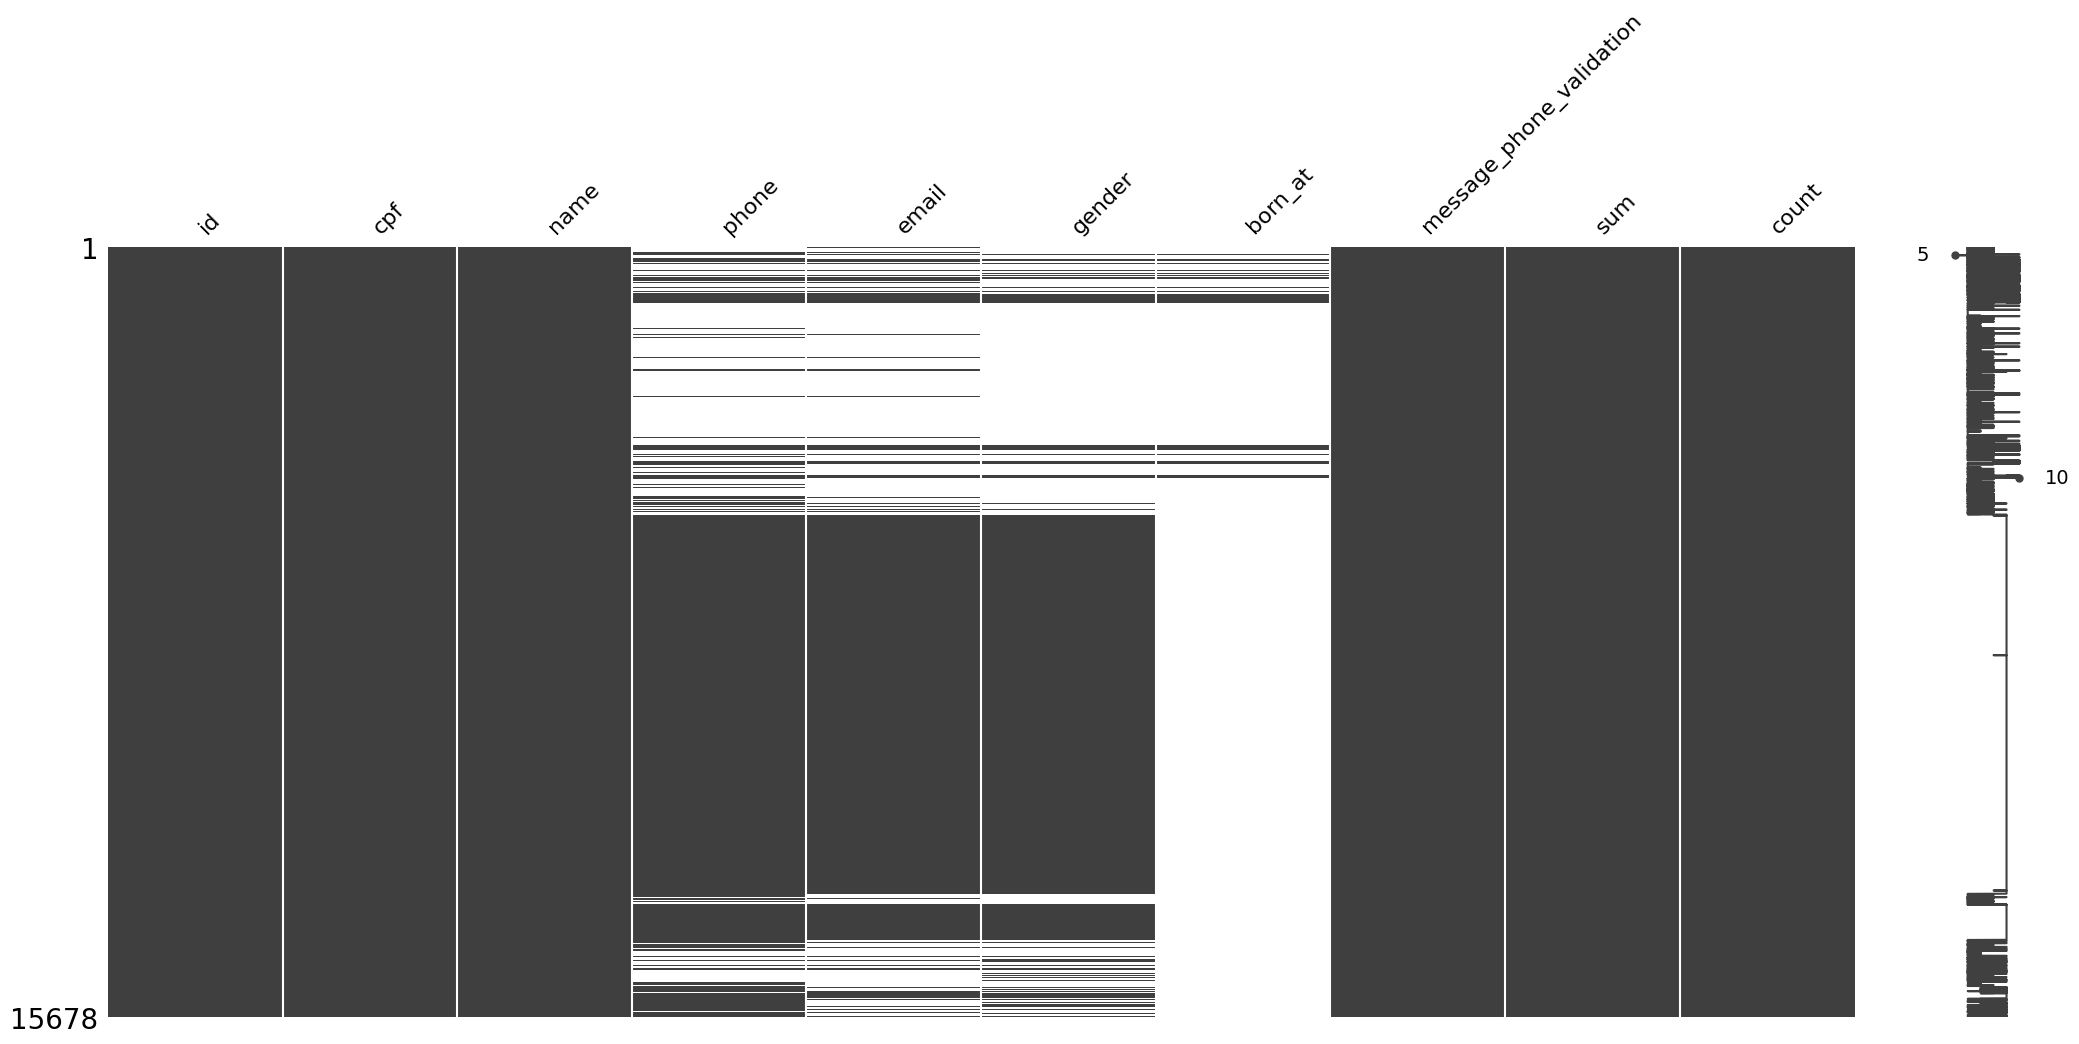

In [29]:
# salvando um NOVO dataset para tratamento de missings (cuidado para não sobrescrever o dataset original!)

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas
crek = dataset[col[:]]

# substituindo os zeros por NaN
crek.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(crek)

In [30]:
# verificando nulls no dataset
crek.isnull().sum()

id                              0
cpf                             0
name                            0
phone                        5125
email                        6013
gender                       6038
born_at                     15195
message_phone_validation        0
sum                             4
count                           0
dtype: int64

Com essa visualização, podemos observar que existem valores agora considerados nulo no Dataset transformado. Com isso, podemos concluir que, aqui, existem valores abaixo de zero, ainda que não existam valores negativos nas quantidades vendidas.


## 1.2 Visualizações de dados

Agora, vamos anáise visualmente como estão distribuídos esse dataset olhando para os atributos Id e Total_valeu por clientes.

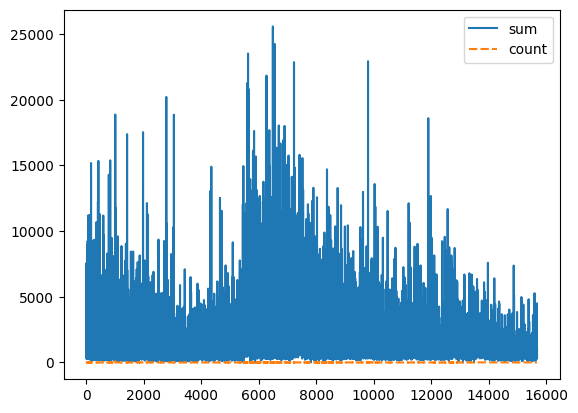

In [31]:
# gráfico de linhas com Seaborn
sns.lineplot(data=dataset.drop(['cpf', 'name', 'id', 'phone', 'email', 'gender', 'born_at', 'message_phone_validation', ], axis=1));

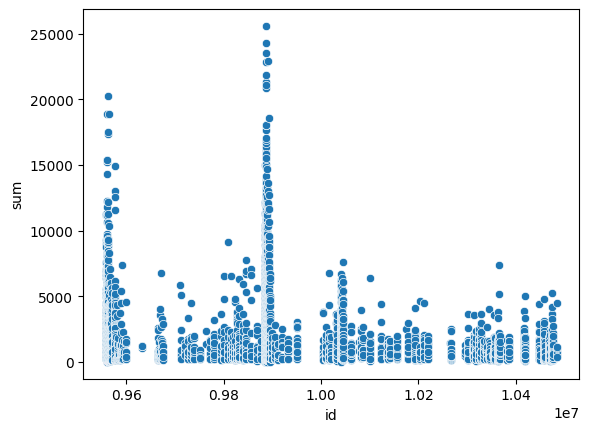

In [32]:
# scatter plot com Seaborn
sns.scatterplot(x='id', y='sum', data=dataset);